# Predicción de Glucosa en Sangre con Redes Neuronales (versión corregida)

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Carga y preprocesamiento de datos

In [57]:
# Cargar el dataset
df = pd.read_csv("diabetes.csv")

# Separar variables predictoras y objetivo
X = df.drop(columns=['Glucose'])
y = df['Glucose'].values.reshape(-1, 1)

# Normalizar X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalizar y
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Convertir a tensores
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

## Definición del modelo

In [58]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X.shape[1], 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.out = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.out(x)
        return x

model = NeuralNetwork()

## Entrenamiento del modelo

In [ ]:
# Función de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrenar
epochs = 300
loss_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/500, Loss: 1.0452
Epoch 20/500, Loss: 1.0160
Epoch 30/500, Loss: 0.9958
Epoch 40/500, Loss: 0.9811
Epoch 50/500, Loss: 0.9697
Epoch 60/500, Loss: 0.9602
Epoch 70/500, Loss: 0.9516
Epoch 80/500, Loss: 0.9436
Epoch 90/500, Loss: 0.9359
Epoch 100/500, Loss: 0.9283
Epoch 110/500, Loss: 0.9206
Epoch 120/500, Loss: 0.9128
Epoch 130/500, Loss: 0.9049
Epoch 140/500, Loss: 0.8968
Epoch 150/500, Loss: 0.8885
Epoch 160/500, Loss: 0.8802
Epoch 170/500, Loss: 0.8719
Epoch 180/500, Loss: 0.8636
Epoch 190/500, Loss: 0.8553
Epoch 200/500, Loss: 0.8471
Epoch 210/500, Loss: 0.8391
Epoch 220/500, Loss: 0.8314
Epoch 230/500, Loss: 0.8239
Epoch 240/500, Loss: 0.8166
Epoch 250/500, Loss: 0.8095
Epoch 260/500, Loss: 0.8026
Epoch 270/500, Loss: 0.7959
Epoch 280/500, Loss: 0.7893
Epoch 290/500, Loss: 0.7829
Epoch 300/500, Loss: 0.7766
Epoch 310/500, Loss: 0.7706
Epoch 320/500, Loss: 0.7649
Epoch 330/500, Loss: 0.7593
Epoch 340/500, Loss: 0.7540
Epoch 350/500, Loss: 0.7488
Epoch 360/500, Loss: 0.7438
E

## Evolución del error

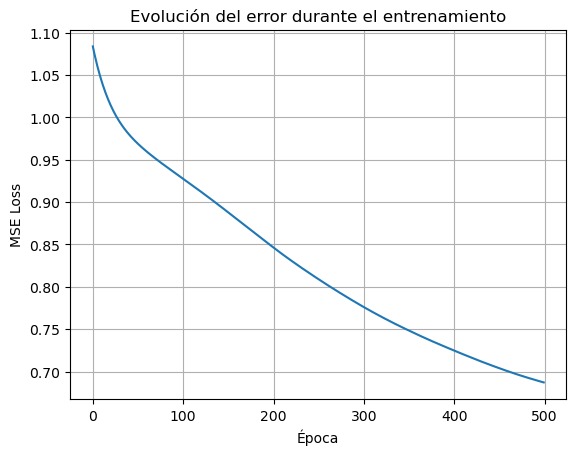

In [60]:
plt.plot(loss_history)
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

## Evaluación del modelo

In [61]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.6808


## Comparación valores reales vs. predichos

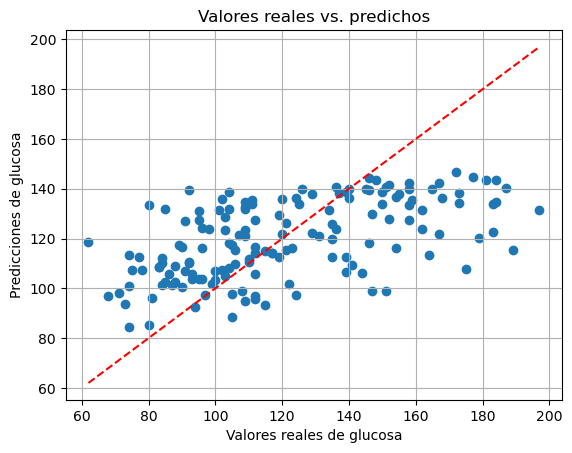

In [62]:
# Desnormalizar
y_test_orig = scaler_y.inverse_transform(y_test.numpy())
predictions_orig = scaler_y.inverse_transform(predictions.numpy())

plt.scatter(y_test_orig, predictions_orig)
plt.xlabel("Valores reales de glucosa")
plt.ylabel("Predicciones de glucosa")
plt.title("Valores reales vs. predichos")
plt.grid(True)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.show()